# Problem Difinition
This project is to predict the presence of heart diesease based on other health related factors of patients

### Data Dictionary
*The dataset provides information about patients and their heart disease status. Each column in this dataset typically represents a different attribute or characteristic of the patients*

* `Age`: The age of the patient.
* `Sex`: The gender of the patient (0 for `female`, 1 for `male`).
* `CP`: Chest pain type, which is typically categorized into four values, indicating different types of chest pain.
  * 0: Typical angina
  * 1: Atypical angina
  * 2: Non-anginal pain
  * 3: Asymptomatic
* `Trestbps`: Resting blood pressure (in mm Hg) when the patient was admitted to the hospital.
* `Chol`: Serum cholesterol level in mg/dl.
* `Fbs`: Fasting blood sugar level (1 if the fasting blood sugar `> 120 mg/dl`, 0 `otherwise`).
* `Restecg`: Resting electrocardiographic results, typically categorized into three values.
  * 0: Normal
  * 1: ST-T wave abnormality
  * 2: Probable or definite left ventricular hypertrophy
* `Thalach`: Maximum heart rate achieved during an exercise test.
* `Exang`: Exercise-induced angina (1 if `yes`, 0 if `no`).
* `Oldpeak`: ST depression induced by exercise relative to rest.
* `Slope`: The slope of the peak exercise ST segment, categorized into three values.
  * 0: Upsloping
  * 1: Flat
  * 2: Downsloping
* `Ca`: Number of major vessels colored by fluoroscopy (0-3).
* `Thal`: Thallium stress test result, which can have three values.
  * 3: Normal
  * 6: Fixed defect
  * 7: Reversible defect
* `Target`: The presence of heart disease, typically binary (0 for `no disease`, 1 for the `presence of disease`).

## Import the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_roc_curve
%matplotlib inline

### Load and Explore Data(Heart-Disease)

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Heart Disease Frequency according to Sex

In [3]:
# compare Target column with Sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


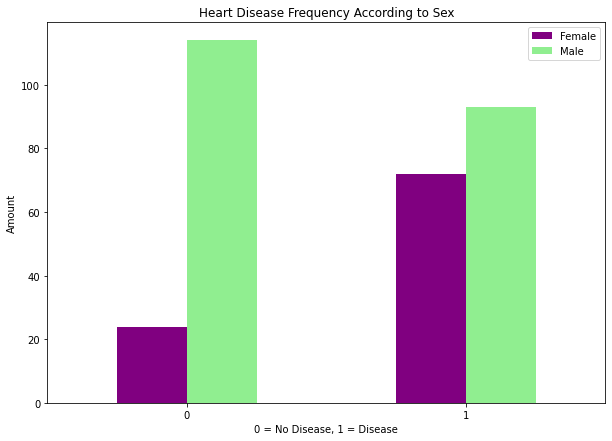

In [4]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize=(10,7), color=['purple', 'lightgreen']);
plt.title("Heart Disease Frequency According to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

## Age Vs. Max Heart Rate for Heart Disease

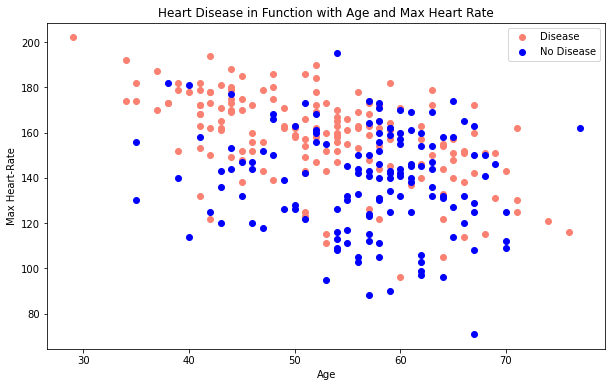

In [5]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with Positive Examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c='salmon');

# Scatter with Negative Examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c='blue');

# Add some info
plt.title("Heart Disease in Function with Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel('Max Heart-Rate')
plt.legend(['Disease', 'No Disease']);

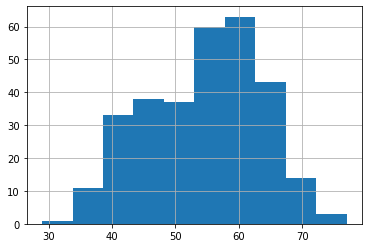

In [6]:
# Check for distribution type of Age using Histogram
df.age.hist();

### Heart Disease Frequency Per Chest Pain Type
CP: Chest pain type, which is typically categorized into four values, indicating different types of chest pain. 
* 0: Typical angina
* 1: Atypical angina
* 2: Non-anginal pain
* 3: Asymptomatic

In [7]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [8]:
print('Typical angina:')
print(f'Heart Disease = {(39/(104+39))*100:.2f}%')
print(f'No Heart Disease = {(104/(104+39))*100:.2f}%')

Typical angina:
Heart Disease = 27.27%
No Heart Disease = 72.73%


In [9]:
print('Atypical angina:')
print(f'Heart Disease = {(41/(41+9))*100:.2f}%')
print(f'No Heart Disease = {(9/(41+9))*100:.2f}%')

Atypical angina:
Heart Disease = 82.00%
No Heart Disease = 18.00%


In [10]:
print('Non-anginal pain:')
print(f'Heart Disease = {(69/(18+69))*100:.2f}%')
print(f'No Heart Disease = {(18/(18+69))*100:.2f}%')

Non-anginal pain:
Heart Disease = 79.31%
No Heart Disease = 20.69%


In [11]:
print('Asymptomatic:')
print(f'Heart Disease = {(16/(16+7))*100:.2f}%')
print(f'No Heart Disease = {(7/(16+7))*100:.2f}%')

Asymptomatic:
Heart Disease = 69.57%
No Heart Disease = 30.43%


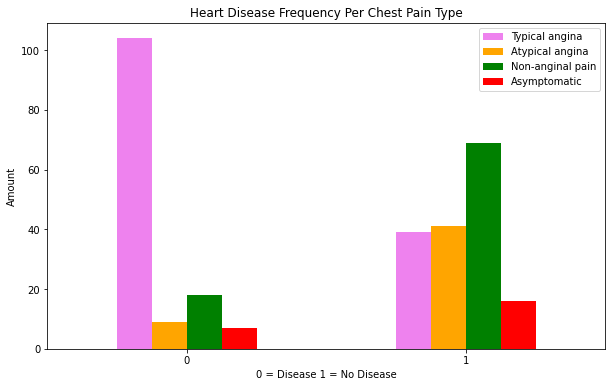

In [12]:
pd.crosstab(df.target, df.cp).plot(kind = 'bar', figsize = (10,6), color=['violet', 'orange', 'green', 'red'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('0 = Disease 1 = No Disease')
plt.ylabel('Amount')
plt.legend(['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.xticks(rotation=0);

## Let's now find a Correlation between our variables

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


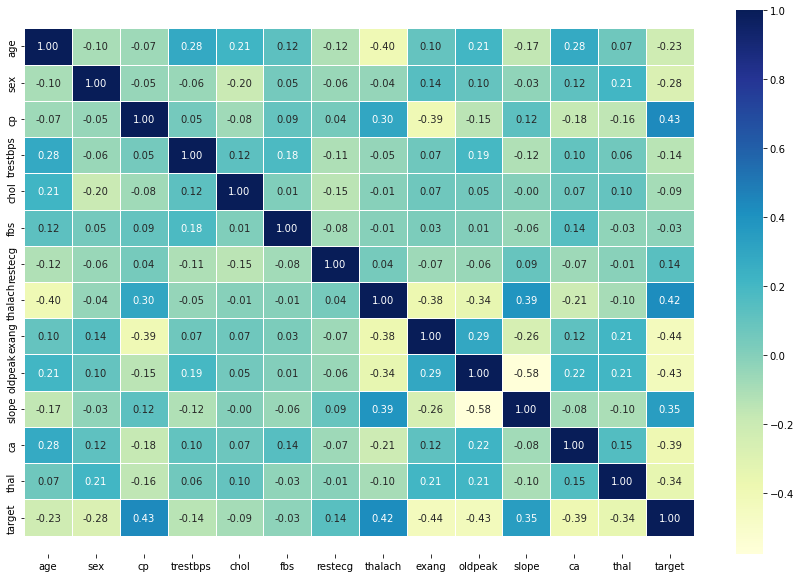

In [14]:
# Let's plot a heatmap with our correlation matrix
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot=True,
                linewidths=0.5, fmt='.2f', cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Now It's time to Choose the right Model for our Prediction
  We will first split our model into training and test set before we pass it through the selected estimator(model)
  * This is a Classification problem since we are predicting whether a patient has heart disease or not
  * Logistic Regression

In [15]:
# Split the model into features(x) and target(y)
x = df.drop('target', axis=1)
y = df['target']

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(33)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=0.1866626528544617, solver='lbfgs', penalty='l2')

In [26]:
#  Train our regressor with the train dataset
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
# Make Prediction with the regressor
reg_pred = regressor.predict(x_test)
reg_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [28]:
regressor.score(x_test, y_test)

0.819672131147541

In [29]:
classification_report(y_test, reg_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.71      0.78        28\n           1       0.79      0.91      0.85        33\n\n    accuracy                           0.82        61\n   macro avg       0.83      0.81      0.81        61\nweighted avg       0.83      0.82      0.82        61\n'

# Export the model 

In [30]:
import joblib

In [33]:
joblib.dump(regressor, 'trained_model1.pkl')

['trained_model1.pkl']

In [34]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']